In [33]:
import warnings
warnings.filterwarnings("ignore")

In [34]:
import pandas as pd
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, jaccard_score, f1_score, log_loss, mean_absolute_error,
    mean_squared_error, r2_score
)
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
'''
Data is collected from  https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package
'''

In [36]:
df = pd.read_csv('weatherAUS.csv')
print("Dataset Overview:")
print(df.head())
print("\nData Types:")
print(df.dtypes)

Dataset Overview:
         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \


In [37]:
print("\nPreprocessing Data...")
categorical_columns = ['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
df_proc = pd.get_dummies(data=df, columns=categorical_columns)

df_proc.replace(['No', 'Yes'], [0, 1], inplace=True)

df_proc.drop(['Date', 'Location'], axis=1, inplace=True)

df_proc = df_proc.astype(float)

df_proc.dropna(inplace=True)

features = df_proc.drop(columns='RainTomorrow', axis=1)
Y = df_proc['RainTomorrow']


Preprocessing Data...


In [38]:
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=0.2, random_state=10)


In [39]:
print("\nLinear Regression:")
LinearReg = LinearRegression()
LinearReg.fit(x_train, y_train)
predictions = LinearReg.predict(x_test)
LinearRegression_MAE = mean_absolute_error(y_test, predictions)
LinearRegression_MSE = mean_squared_error(y_test, predictions)
LinearRegression_R2 = r2_score(y_test, predictions)
print(f"MAE: {LinearRegression_MAE}")
print(f"MSE: {LinearRegression_MSE}")
print(f"R2 Score: {LinearRegression_R2}")


Linear Regression:
MAE: 0.24118600398018283
MSE: 0.10713001435170146
R2 Score: 0.37359094721168984


In [40]:
print("\nK-Nearest Neighbors (KNN):")
KNN = KNeighborsClassifier(n_neighbors=4)
KNN.fit(x_train, y_train)
predictions = KNN.predict(x_test)
KNN_Accuracy_Score = accuracy_score(y_test, predictions)
KNN_JaccardIndex = jaccard_score(y_test, predictions)
KNN_F1_Score = f1_score(y_test, predictions, average='weighted')
print(f"Accuracy: {KNN_Accuracy_Score}")
print(f"Jaccard Index: {KNN_JaccardIndex}")
print(f"F1 Score: {KNN_F1_Score}")


K-Nearest Neighbors (KNN):
Accuracy: 0.8445515579273541
Jaccard Index: 0.37745604963805585
F1 Score: 0.8277229803396097


In [41]:
print("\nDecision Tree:")
Tree = DecisionTreeClassifier(criterion="entropy", max_depth=8)
Tree.fit(x_train, y_train)
predictions = Tree.predict(x_test)
Tree_Accuracy_Score = accuracy_score(y_test, predictions)
Tree_JaccardIndex = jaccard_score(y_test, predictions)
Tree_F1_Score = f1_score(y_test, predictions)
print(f"Accuracy: {Tree_Accuracy_Score}")
print(f"Jaccard Index: {Tree_JaccardIndex}")
print(f"F1 Score: {Tree_F1_Score}")



Decision Tree:
Accuracy: 0.8473919779652264
Jaccard Index: 0.4036326942482341
F1 Score: 0.5751258087706685


In [42]:
print("\nLogistic Regression:")
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=0.2, random_state=1)
LR = LogisticRegression(solver='liblinear')
LR.fit(x_train, y_train)
predictions = LR.predict(x_test)
LR_Accuracy_Score = accuracy_score(y_test, predictions)
LR_JaccardIndex = jaccard_score(y_test, predictions)
LR_F1_Score = f1_score(y_test, predictions)
LR_Log_Loss = log_loss(y_test, LR.predict_proba(x_test))
print(f"Accuracy: {LR_Accuracy_Score}")
print(f"Jaccard Index: {LR_JaccardIndex}")
print(f"F1 Score: {LR_F1_Score}")
print(f"Log Loss: {LR_Log_Loss}")



Logistic Regression:
Accuracy: 0.8539335513857806
Jaccard Index: 0.4552166934189406
F1 Score: 0.6256342378116038
Log Loss: 0.3341156625153283


In [43]:
print("\nSupport Vector Machine (SVM):")
SVM = LinearSVC()
SVM.fit(x_train, y_train)
predictions = SVM.predict(x_test)
SVM_Accuracy_Score = accuracy_score(y_test, predictions)
SVM_JaccardIndex = jaccard_score(y_test, predictions)
SVM_F1_Score = f1_score(y_test, predictions)
print(f"Accuracy: {SVM_Accuracy_Score}")
print(f"Jaccard Index: {SVM_JaccardIndex}")
print(f"F1 Score: {SVM_F1_Score}")



Support Vector Machine (SVM):
Accuracy: 0.8541056980547427
Jaccard Index: 0.4473426801434627
F1 Score: 0.6181572426222122


In [44]:
print("\nSummary of Results:")
Report = {
    'Classification Algorithm': ['Linear Regression', 'KNN (K=4)', 'Decision Tree', 'Logistic Regression', 'SVM'],
    'Accuracy Score': [None, KNN_Accuracy_Score, Tree_Accuracy_Score, LR_Accuracy_Score, SVM_Accuracy_Score],
    'Jaccard Score': [None, KNN_JaccardIndex, Tree_JaccardIndex, LR_JaccardIndex, SVM_JaccardIndex],
    'F1 Score': [None, KNN_F1_Score, Tree_F1_Score, LR_F1_Score, SVM_F1_Score],
    'Log Loss': [None, 'N/A', 'N/A', LR_Log_Loss, 'N/A']
}
Report_df = pd.DataFrame(Report)
print(Report_df)


Summary of Results:
  Classification Algorithm  Accuracy Score  Jaccard Score  F1 Score  Log Loss
0        Linear Regression             NaN            NaN       NaN      None
1                KNN (K=4)        0.844552       0.377456  0.827723       N/A
2            Decision Tree        0.847392       0.403633  0.575126       N/A
3      Logistic Regression        0.853934       0.455217  0.625634  0.334116
4                      SVM        0.854106       0.447343  0.618157       N/A



Plotting the Results...


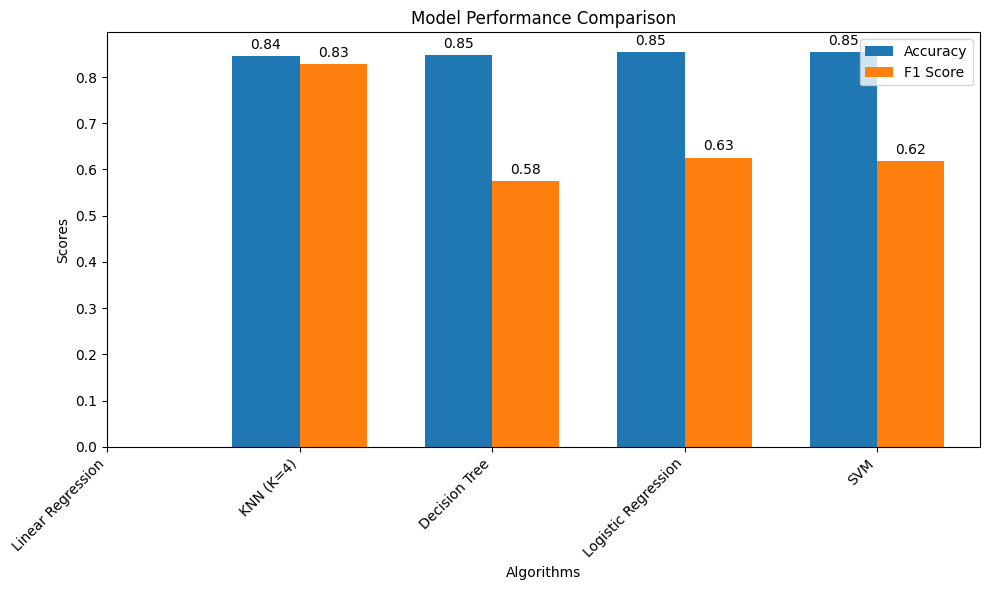

In [45]:
print("\nPlotting the Results...")
def plot_results(report):
    algorithms = report['Classification Algorithm']
    accuracy = report['Accuracy Score']
    f1_scores = report['F1 Score']

    x = np.arange(len(algorithms))
    width = 0.35

    fig, ax = plt.subplots(figsize=(10, 6))
    bars1 = ax.bar(x - width/2, accuracy, width, label='Accuracy')
    bars2 = ax.bar(x + width/2, f1_scores, width, label='F1 Score')

    ax.set_xlabel('Algorithms')
    ax.set_ylabel('Scores')
    ax.set_title('Model Performance Comparison')
    ax.set_xticks(x)
    ax.set_xticklabels(algorithms, rotation=45, ha='right')
    ax.legend()

    for bar in bars1:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    for bar in bars2:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

plot_results(Report_df)